## Import the required libraries


In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install hdbscan==0.8.40
!pip install geopandas==1.0.1
!pip install contextily==1.6.2
!pip install shapely==2.0.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 138.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 138.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 141.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 162.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 167.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 136.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.40-cp312-cp312-linux_x86_64.whl size=847016 sha256=93b1bf9ddc214b1a17891bbe38845648adf661bde3d7142

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.preprocessing import StandardScaler

# geographical tools
import geopandas as gpd 
import contextily as ctx  # used for obtianing a basemap of Canada
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import requests
import zipfile
import io
import os

zip_file_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/YcUk-ytgrPkmvZAh5bf7zA/Canada.zip'

output_dir = './'
os.makedirs(output_dir, exist_ok=True)

response = requests.get(zip_file_url)
response.raise_for_status()  

with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    
    for file_name in zip_ref.namelist():
        if file_name.endswith('.tif'): 
           
            zip_ref.extract(file_name, output_dir)
            print(f"Downloaded and extracted: {file_name}")

Downloaded and extracted: Canada.tif


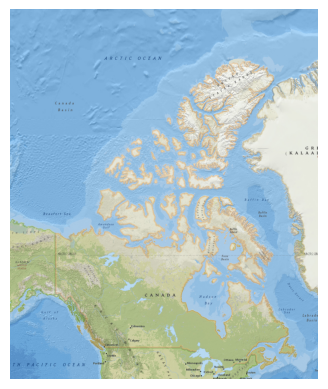

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


tif_file = "Canada.tif"


img = Image.open(tif_file)

plt.imshow(img)
plt.axis("off")  
plt.show()


## Including a plotting function



In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_clustered_locations(df, title='Museums Clustered by Proximity'):
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs="EPSG:4326")

    fig, ax = plt.subplots(figsize=(10, 6))
    non_noise = gdf[gdf['Cluster'] != -1]
    noise = gdf[gdf['Cluster'] == -1]

    noise.plot(ax=ax, color='k', markersize=30, label='Noise')
    non_noise.plot(ax=ax, column='Cluster', cmap='tab10', markersize=30, legend=True)

    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


In [ ]:

def plot_clustered_locations(df,  title='Museums Clustered by Proximity'):
    """
    Plots clustered locations and overlays on a basemap.
    
    Parameters:
    - df: DataFrame containing 'Latitude', 'Longitude', and 'Cluster' columns
    - title: str, title of the plot
    """
    
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs="EPSG:4326")
    
    gdf = gdf.to_crs(epsg=3857)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    
    non_noise = gdf[gdf['Cluster'] != -1]
    noise = gdf[gdf['Cluster'] == -1]
    
    noise.plot(ax=ax, color='k', markersize=30, ec='r', alpha=1, label='Noise')
    
    non_noise.plot(ax=ax, column='Cluster', cmap='tab10', markersize=30, ec='k', legend=False, alpha=0.6)
    
    ctx.add_basemap(ax, source='./Canada.tif', zoom=4)
   
    plt.title(title, )
    plt.xlabel('Longitude', )
    plt.ylabel('Latitude', )
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    
    plt.show()

In [47]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/r-maSj5Yegvw2sJraT15FA/ODCAF-v1-0.csv'
df = pd.read_csv(url, encoding = "ISO-8859-1")

In [48]:
df.head()

Index                      Facility_Name            Source_Facility_Type  \
0      1                   #Hashtag Gallery                              ..   
1      2  'Ksan Historical Village & Museum  historic site-building or park   
2      3               'School Days' Museum       community/regional museum   
3      4                   10 Austin Street       built heritage properties   
4      5              10 Gates Dancing Inc.                            arts   

         ODCAF_Facility_Type                      Provider Unit Street_No  \
0                    gallery                       toronto   ..       801   
1                     museum  canadian museums association   ..      1500   
2                     museum  canadian museums association   ..       427   
3  heritage or historic site                       moncton   ..        10   
4              miscellaneous                        ottawa   ..        ..   

   Street_Name Postal_Code         City Prov_Terr  \
0  dundas st w     M6J 1V2      toronto        on   
1       62 hwy     V0J 1Y0     hazelton        bc   
2     queen st     E3B 5R6  fredericton        nb   
3    austin st     E1C 1Z6      moncton        nb   
4           ..          ..       ottawa        on   

                               Source_Format_Address     CSD_Name   CSDUID  \
0                                    801 dundas st w      Toronto  3520005   
1  1500 hwy 62 hazelton british columbia v0j 1y0 ...     Hazelton  5949022   
2  427 queen st fredericton new brunswick e3b 5r6...  Fredericton  1310032   
3                                       10 austin st      Moncton  1307022   
4                                                 ..       Ottawa  3506008   

  PRUID     Latitude     Longitude  
0    35  43.65169472  -79.40803272  
1    59   55.2645508  -127.6428124  
2    13    45.963283   -66.6419017  
3    13  46.09247776  -64.78022946  
4    35  45.40856224  -75.71536766

In [49]:
df.ODCAF_Facility_Type.value_counts()

ODCAF_Facility_Type
library or archives                     3013
museum                                  1938
gallery                                  810
heritage or historic site                620
theatre/performance and concert hall     583
festival site                            346
miscellaneous                            343
art or cultural centre                   225
artist                                    94
Name: count, dtype: int64

In [50]:
df = df[df.ODCAF_Facility_Type == 'museum']
df.ODCAF_Facility_Type.value_counts()

ODCAF_Facility_Type
museum    1938
Name: count, dtype: int64

In [51]:
df = df[['Latitude', 'Longitude']]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 1 to 7969
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Latitude   1938 non-null   object
 1   Longitude  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [ ]:
df = df[df.Latitude!='..']

df[['Latitude','Longitude']] = df[['Latitude','Longitude']].astype('float')

In [ ]:
coords_scaled = df.copy()
coords_scaled["Latitude"] = 2*coords_scaled["Latitude"]

### Applying DBSCAN with Euclidean distance to the scaled coordinates


In [ ]:
min_samples=3
eps=1.0 
metric='euclidean' 

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric).fit(coords_scaled)

### Add cluster labels to the DataFrame


In [ ]:
df['Cluster'] = dbscan.fit_predict(coords_scaled) 

df['Cluster'].value_counts()

Cluster
 4     701
 2     192
 1     181
 7     134
 3      94
-1      79
 6      30
 10     27
 8      21
 11     15
 15     13
 20     11
 16     10
 19      9
 27      8
 12      7
 26      6
 5       6
 24      6
 28      6
 14      6
 18      6
 13      4
 9       4
 22      4
 0       3
 23      3
 21      3
 17      3
 25      3
 29      3
 31      3
 30      3
 32      3
Name: count, dtype: int64

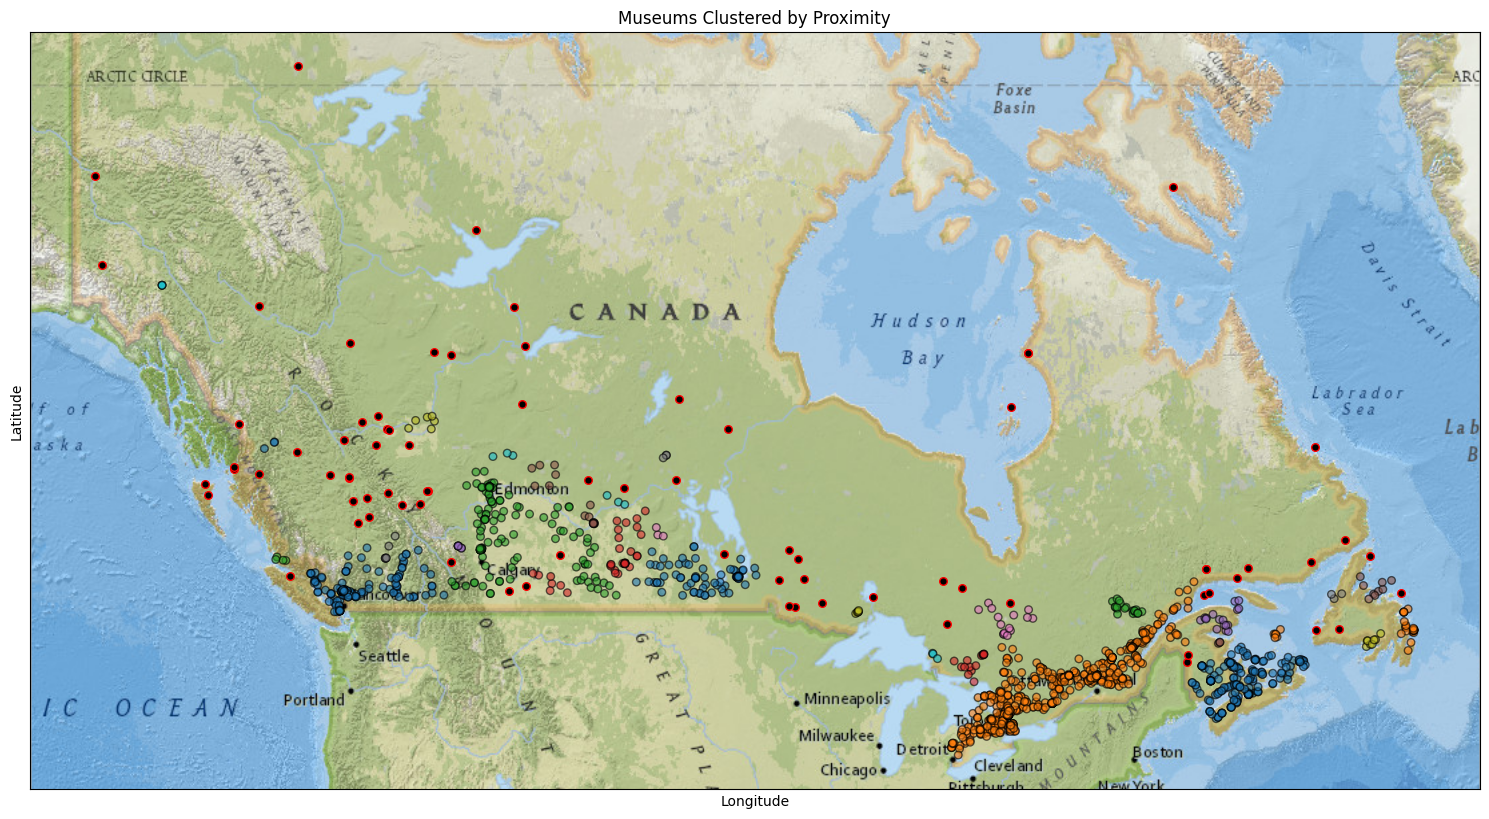

In [56]:
plot_clustered_locations(df, title='Museums Clustered by Proximity')

#### Initializing an HDBSCAN model


In [ ]:
min_samples=None
min_cluster_size=3
hdb = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, metric='euclidean')  

In [ ]:

df['Cluster'] = hdb.fit_predict(coords_scaled) 

df['Cluster'].value_counts()

Cluster
-1      468
 142     45
 95      39
 59      34
 77      29
       ... 
 110      3
 0        3
 133      3
 111      3
 136      3
Name: count, Length: 144, dtype: int64

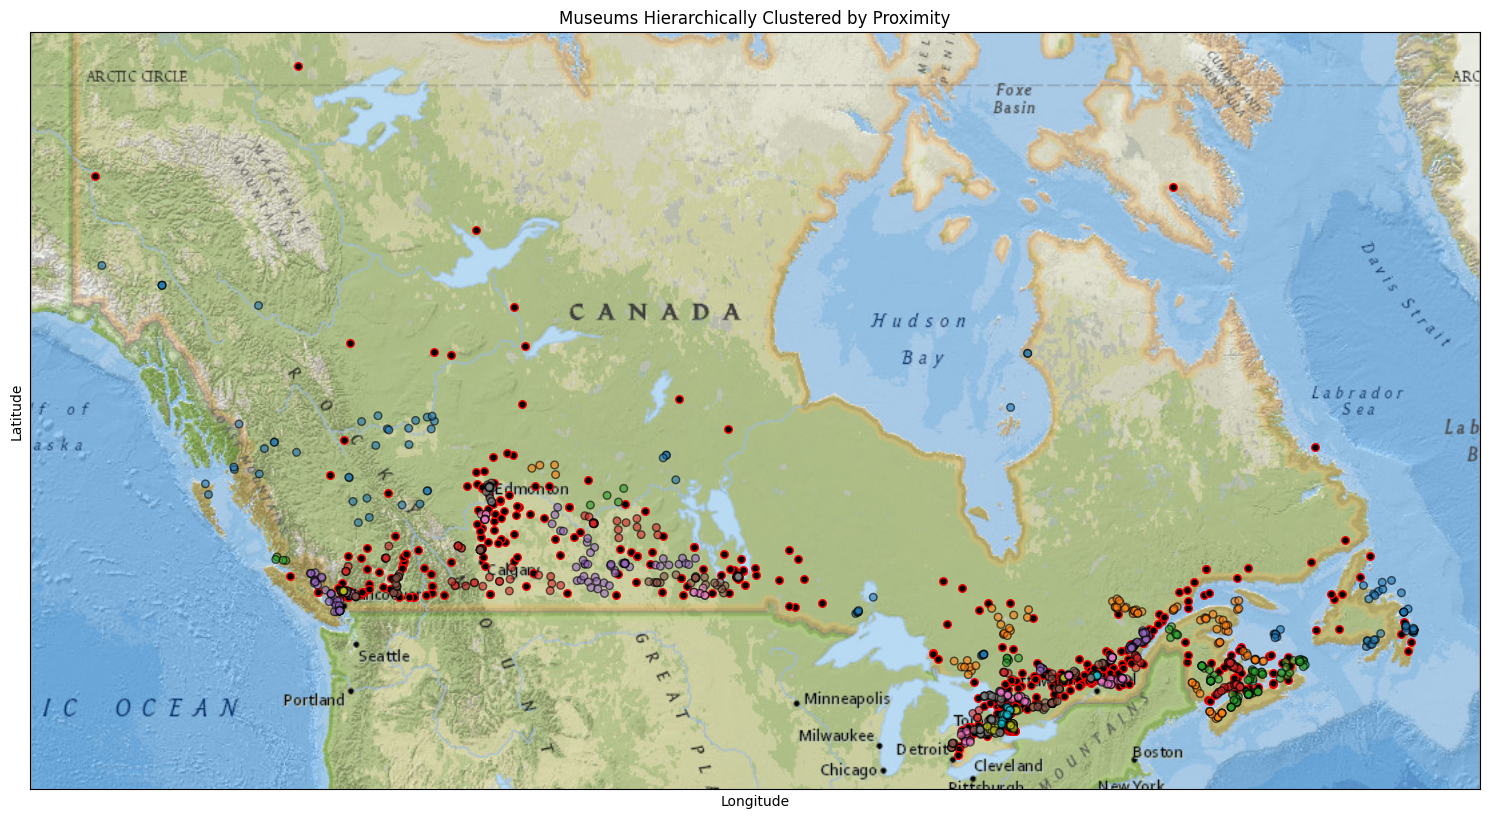

In [ ]:

plot_clustered_locations(df, title='Museums Hierarchically Clustered by Proximity')

<details><summary>Click here for the solution</summary>
    
```python
# Plot the museum clusters
plot_clustered_locations(df, title='Museums Hierarchically Clustered by Proximity')
```


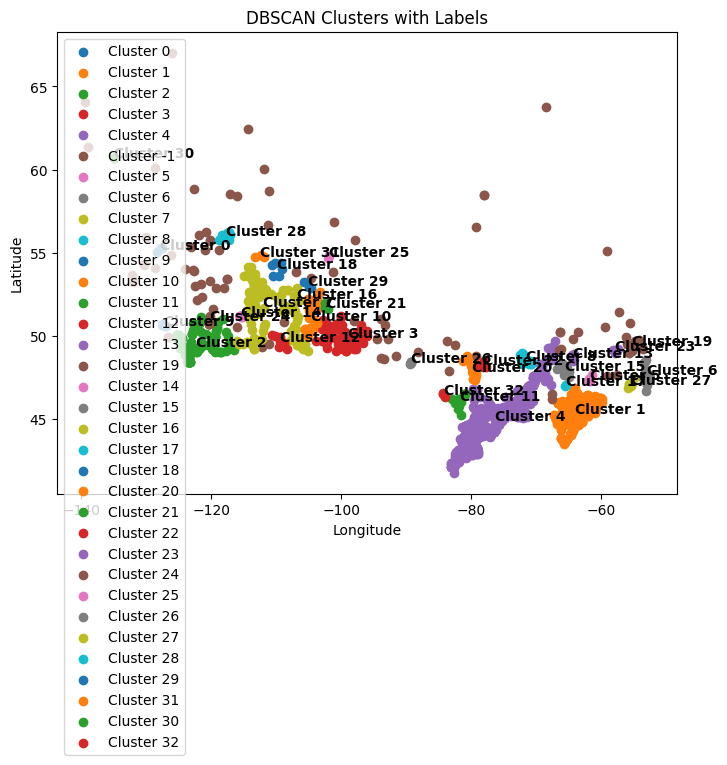

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.0, min_samples=3, metric='euclidean')
df['Cluster_DBSCAN'] = dbscan.fit_predict(coords_scaled)

cluster_centers = df[df['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN')[['Latitude','Longitude']].mean()

plt.figure(figsize=(8,6))
for cluster_id in df['Cluster_DBSCAN'].unique():
    cluster_points = df[df['Cluster_DBSCAN'] == cluster_id]
    plt.scatter(cluster_points['Longitude'], cluster_points['Latitude'], label=f'Cluster {cluster_id}')

for cluster_id, center in cluster_centers.iterrows():
    plt.text(center['Longitude'], center['Latitude'], f'Cluster {cluster_id}', fontsize=10, weight='bold')

plt.legend()
plt.title('DBSCAN Clusters with Labels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
